*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
- [Matrix Differentiation (EN)](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
- [Матричные вычисления (RU)](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)

## Exercise 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N 
$$

$$
\frac{dy}{dx} =  \begin{bmatrix}
\frac{\partial \sum_{i=1}^n x_i^2}{\partial x_1} \\
\vdots \\
\frac{\partial \sum_{i=1}^n x_i^2}{\partial x_N}
\end{bmatrix}  = \begin{bmatrix}
2x_1 \\
\vdots \\
2x_N
\end{bmatrix} = 2x
$$ 

## Exercise 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$ 

$$
    y = \sum^N_{i=1}\sum^N_{j=1} A_{ij} B_{ji}
$$

$$
    \frac{dy}{dA} = \begin{bmatrix}
\frac{\partial y}{\partial A_{11}} \dots \frac{\partial y}{d A_{1n}} \\
\vdots \\
\frac{\partial y}{\partial A_{n1}} \dots \frac{\partial y}{d A_{nn}} 
\end{bmatrix} = \begin{bmatrix}
B_{11} \dots B_{1n} \\
\vdots \\
B_{n1} \dots B_{nn}
\end{bmatrix} = B^T
$$

## Exercise 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N} 
$$

Similar to exercise on

$$
\frac{dy}{dx} = \begin{bmatrix}
\frac{\partial \sum_{i,j=1}^n x_i A_{ij}c_j}{\partial x_1} \\
\vdots \\
\frac{\partial \sum_{i,j=1}^n x_i A_{ij}c_j}{\partial x_N}
\end{bmatrix}  =
\begin{bmatrix}
\sum_{j=1}^n A_{1j}c_j \\
\vdots \\
\sum_{j=1}^n A_{nj}c_j
\end{bmatrix}=Ac
$$

$$
\frac{dy}{dA} = \begin{bmatrix}
\frac{\partial y}{\partial A_{11}} \dots \frac{\partial y}{d A_{1n}} \\
\vdots \\
\frac{\partial y}{\partial A_{n1}} \dots \frac{\partial y}{d A_{nn}} 
\end{bmatrix} = x^Tc
$$ 

Hint for the latter (one of the ways): use *ex. 2* result and the fact 
$$
tr(ABC) = tr (CAB)
$$

## Exercise 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ? 
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T) 
$$ 
it is easy to derive gradients (you can find it in one of the refs). 

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">

(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

#### Third approach
And finally we can use chain rule! 
let $ F = AS $ 

**Find**
$$
\frac{dJ}{dF} = \frac{d tr(FF^T)}{d F} = \begin{bmatrix}
    \frac{\partial F_{11}^2}{\partial F_{11}}\dots \frac{\partial F_{n1}^2}{\partial F_{1n}}\\
    \vdots  \\
    \frac{\partial F_{n1}^2}{\partial F_{n1}} \dots  \frac{\partial F_{nn}^2}{\partial F_{nn}} 
\end{bmatrix} = 2F.
$$ 
and 
$$
\frac{dF}{dS} = \frac{d (X - AS)}{d S} = -A
$$ 
(the shape should be $ NM \times RM$).

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  2F \cdot (-A) = (X - AS) \cdot (-A) = ASA - AX   
$$ 

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:* Drastic white lines indicates presence of outlier in test data. This is it, some test points differs in sense of L2 from all points in training set. 

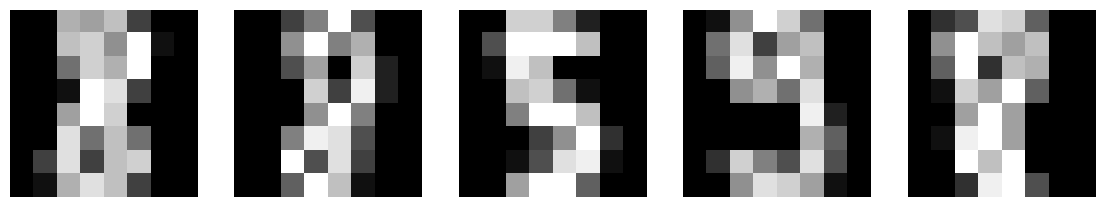




### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$, 

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is 
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:*  1,2,3,5

*Your Explanation:*
1. KNN is translation invariant due to it's mechanism depending on relative distance
2. Similar to one. You just translate on coordinate.
3. You scale space, so order of distance will remain same.
4. Knn is sensitive to scaling of features, because mechanism is coordinate-free (manifold like). Therefore it's better standardize feature before using KNN. (However, i'm not sure about embeddings of NN. They may enjoy importance defined by encoder)
5. KNN is rotation invariant due to it's mechanism depending on relative



## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:*
2,4

*Your Explanation:*
1. Knn boundaries form tesselation known as Voronoi cells.
2. Recall that distance between sample itself is 0. Therefore, closest neighbor will be exact point with right class. 1-NN will always be right. Auxillary points may confuse inference. 
3. Not always, more points better generalization. 
4. True, but really you don't need all points. See KD-trees and Approximate Nearest Neighbors. They are in core of modern vector stores.



